In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create Linear Data with Noise

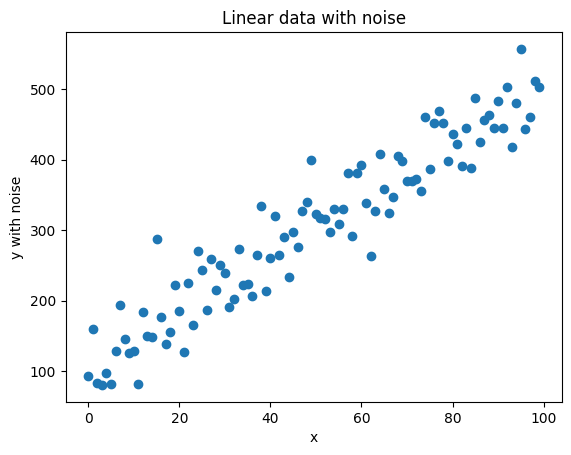

In [28]:
slope = 4.0
intercept = 100

X = np.arange(0, 100, 1)
y = (slope * x) + intercept # y = mx + b

# now we need to add some noise to the data
shape = len(y)
noise = np.random.normal(0, 40, len(y))
y += noise

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.xlabel('x')
plt.ylabel('y with noise')
plt.title('Linear data with noise')
plt.scatter(X, y)
plt.show()

### Use linear sklearn linear regression to find slope and intercept

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # we pass in no parameters since the default parameters are good enough in this case
lin_reg.fit(X, y)

print("The original slope was ", slope, " the predicted slope is ", lin_reg.coef_)
print("The original intercept was ", intercept, " the predicted intercept is ", lin_reg.intercept_)

The original slope was  4.0  the predicted slope is  [[3.97245837]]
The original intercept was  100  the predicted intercept is  [107.96201141]


## Generate linearly separable data

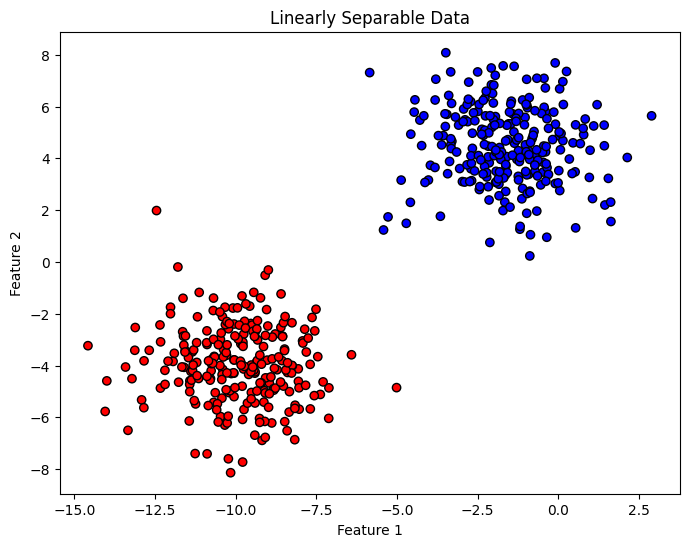

In [113]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=500, n_features=2, centers=2, 
                 cluster_std=1.5, random_state=1)

x0 = X[: 0]
x1 = X[: 1]
y = y.reshape(-1, 1)
y = [c[0] for c in y]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, marker='o', edgecolors='k')
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [114]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=float(1e10))  # Setting C to approximately infinity for hard margin
svm.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

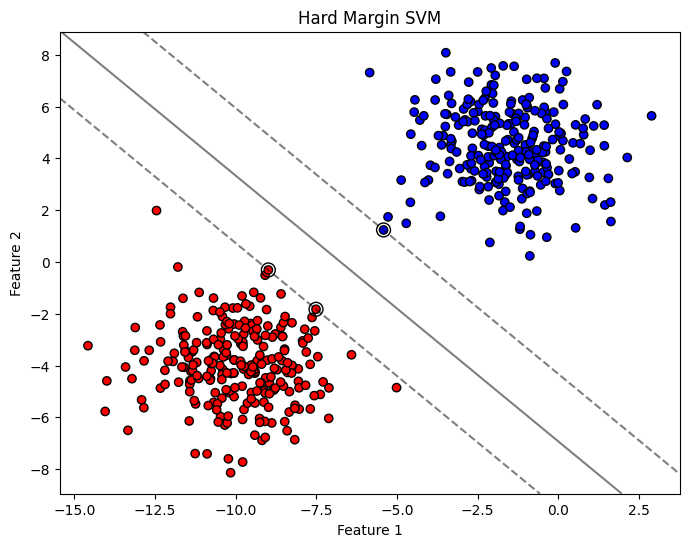

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, marker='o', edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title('Hard Margin SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Make the data non-linearly separable

In [116]:
new_entry_X = [[-10.0, -1.0], [-2.5, 2]]
X = np.vstack([X, new_entry_X])

y.append(0)
y.append(1)

X.shape



(502, 2)

In [117]:
X[:][-1]

array([-2.5,  2. ])

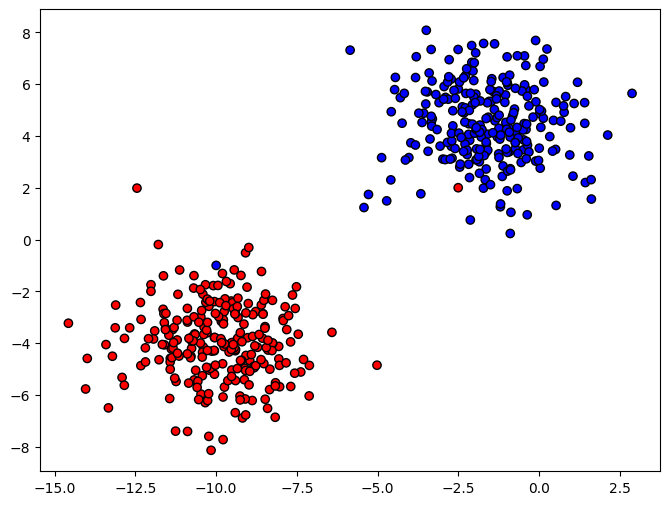

In [118]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, marker='o', edgecolors='k')

In [119]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)  
svm.fit(X, y)

SVC(C=1, kernel='linear')

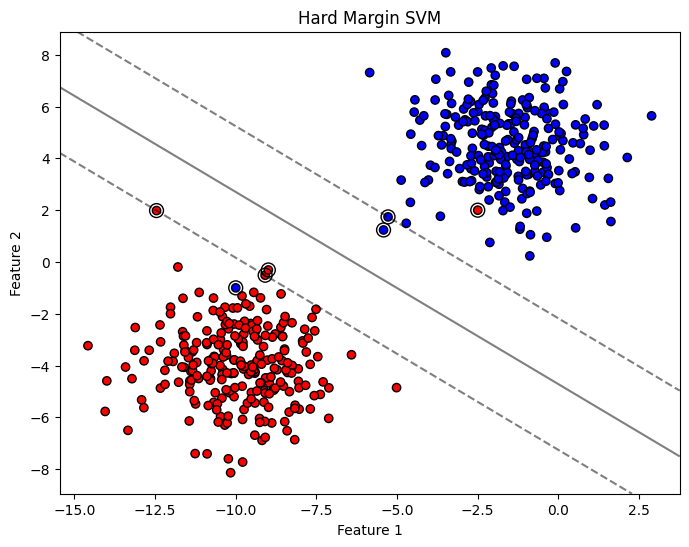

In [120]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, marker='o', edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title('Hard Margin SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Decision Trees, Random Forests, Boosting

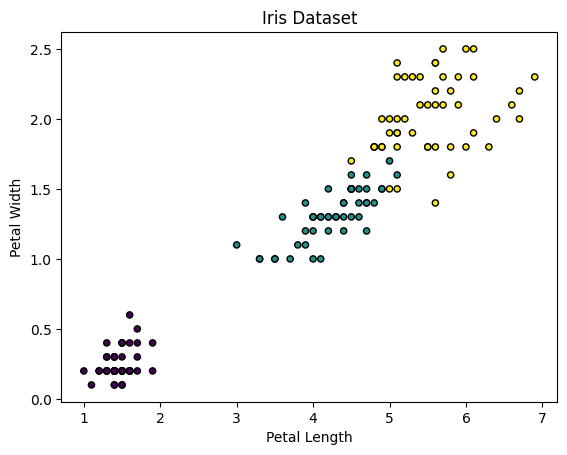

In [138]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [2, 3]]  # Selecting only two features (petal length and petal width)
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Iris Dataset")
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

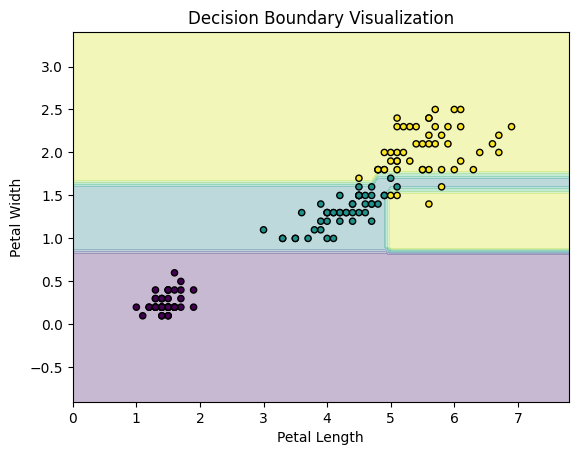

In [151]:
# Visualize decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary Visualization')
plt.show()

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
stump = DecisionTreeClassifier(max_depth=1)

# Note: this is the same as passing estimator=None 
# just demonstrating how you could change the behavior if you wanted to
boosted_clf = AdaBoostClassifier(estimator=stump, n_estimators=10)
boosted_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=10)

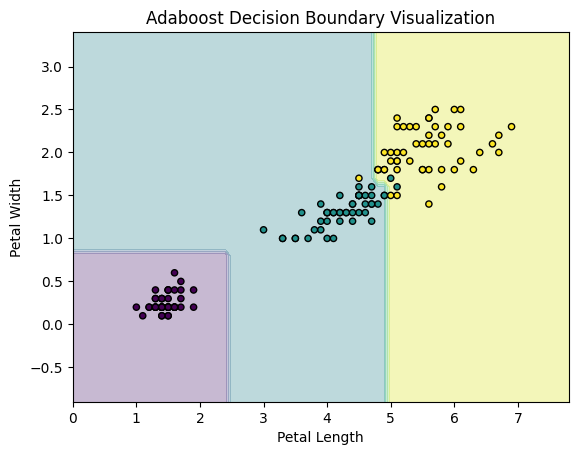

In [153]:
# Visualize decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = boosted_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Adaboost Decision Boundary Visualization')
plt.show()

In [156]:
from sklearn.ensemble import RandomForestClassifier
bagging_clf = RandomForestClassifier(n_estimators=25, max_depth=1)
bagging_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=25)

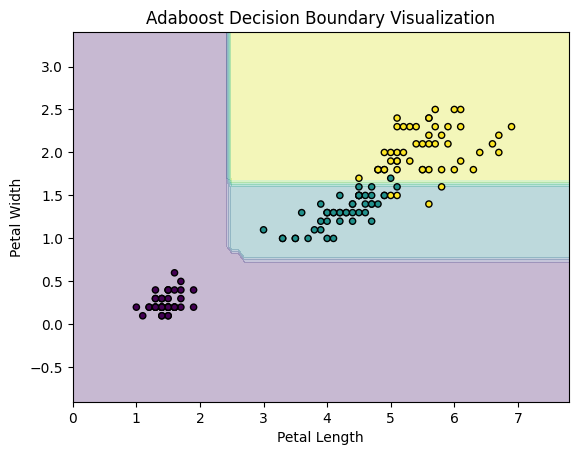

In [157]:
# Visualize decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = bagging_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Adaboost Decision Boundary Visualization')
plt.show()

## K-nearest neighbors

In [158]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

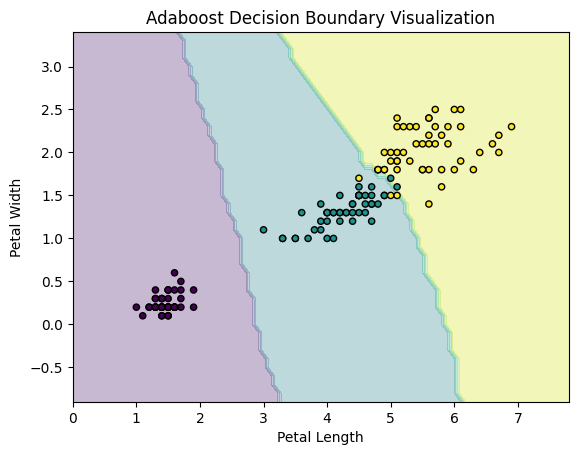

In [159]:
# Visualize decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Adaboost Decision Boundary Visualization')
plt.show()

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

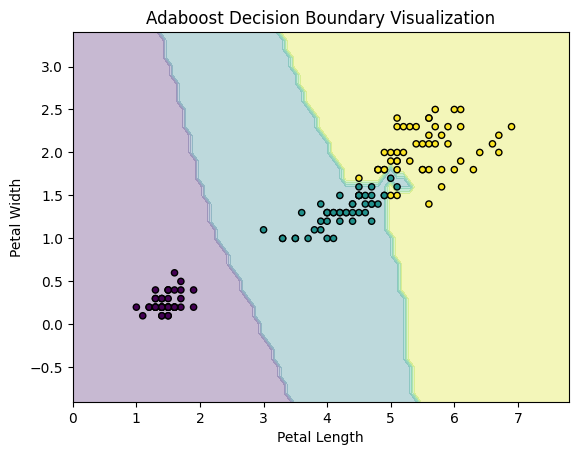

In [161]:
# Visualize decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Adaboost Decision Boundary Visualization')
plt.show()

Is the above model perhaps overfit?

# Unsupervised learning

## k-means clustering

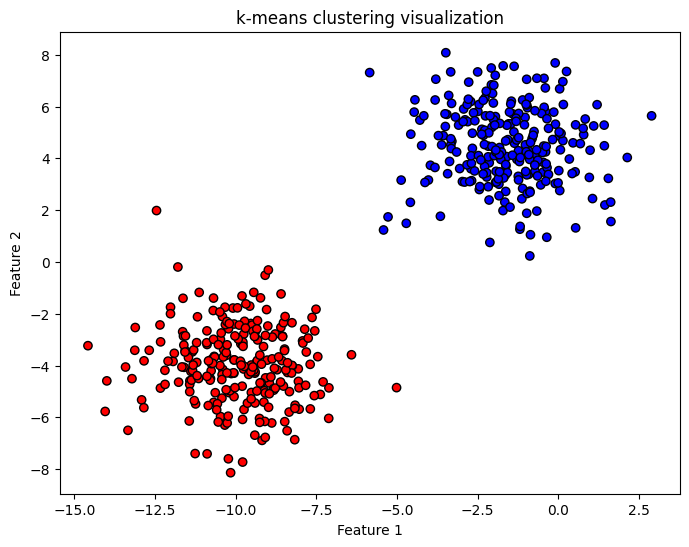

In [187]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=500, n_features=2, centers=2, 
                 cluster_std=1.5, random_state=1)

y = y.reshape(-1, 1)
y = [c[0] for c in y]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, marker='o', edgecolors='k')
plt.title('k-means clustering visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [188]:
from sklearn.cluster import KMeans
k_means_clf = KMeans(n_clusters=2, n_init="auto")
k_means_clf.fit(X)

KMeans(n_clusters=2, n_init='auto')

In [189]:
k_means_clf.cluster_centers_

array([[-9.93781213, -3.94622558],
       [-1.58983112,  4.48102259]])

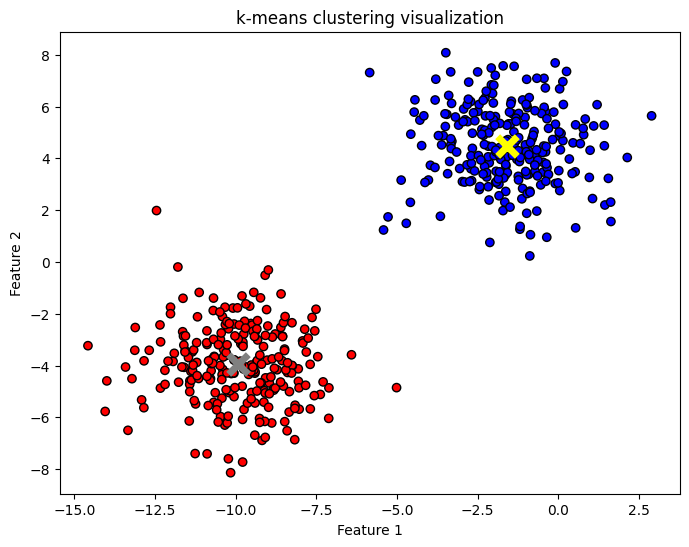

In [190]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, marker='o', edgecolors='k')
plt.scatter(k_means_clf.cluster_centers_[0][0], k_means_clf.cluster_centers_[0][1], 
            linewidths=5, s=200, marker='x', color='gray', label='Red Center')
plt.scatter(k_means_clf.cluster_centers_[1][0], k_means_clf.cluster_centers_[1][1], 
            linewidths=5, s=200, marker='x', color='yellow', label='Blue Center')

plt.title('k-means clustering visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## PCA 

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

The four columns represent sepal length, sepal width, petal length, and petal width

In [209]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(iris.data)


In [212]:
from sklearn.decomposition import PCA
pca_3d = PCA(n_components=3)
pca_3d.fit(X)

X_reduced = pca_3d.fit_transform(iris.data)

In [213]:
X_reduced[:5]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

In [215]:
pca_3d.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [216]:
pca_3d.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

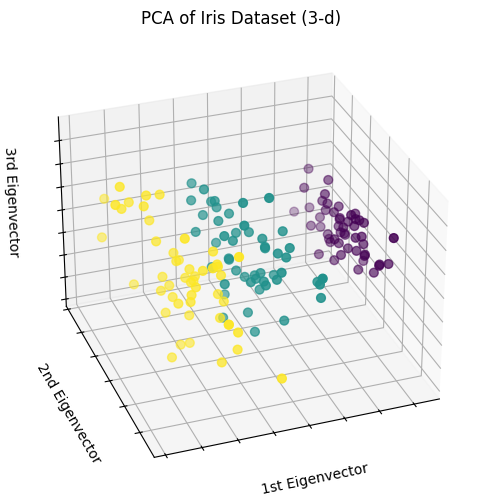

In [214]:
# if we reduce by one dimension
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401


fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

plt.title('PCA of Iris Dataset (3-d)')
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])
plt.show()


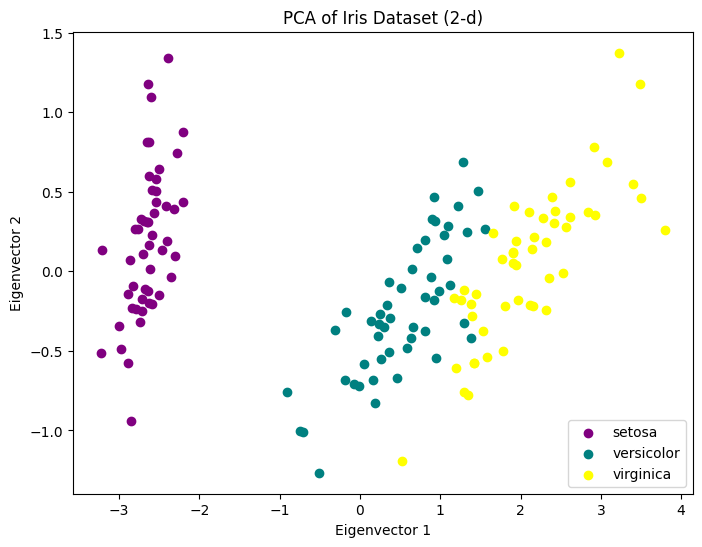

In [228]:
# reduce down to the top 2 eigenvectors

pca_2d = PCA(n_components=2)  # Specify the number of components (2 for 2D visualization)
X_pca = pca_2d.fit_transform(X)

# Plot the PCA-transformed data

colors = ['#800080', '#008080', '#FFFF00']

plt.figure(figsize=(8, 6))
for i, target_name in zip([0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, color=colors[i])
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.title('PCA of Iris Dataset (2-d)')
plt.legend()
plt.show()


In [218]:
pca_2d.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [220]:
pca_2d.explained_variance_ratio_

array([0.92461872, 0.05306648])

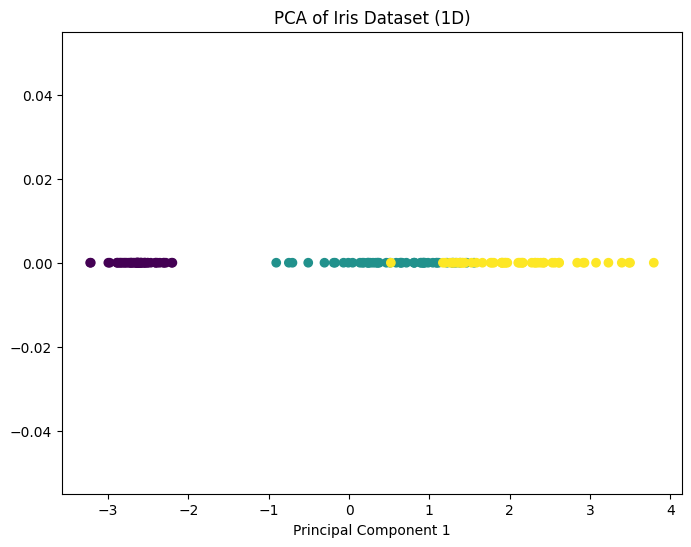

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA with n_components=1
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Plot PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca, np.zeros_like(X_pca), c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.title('PCA of Iris Dataset (1D)')
plt.show()


In [222]:
pca.explained_variance_ratio_

array([0.92461872])